In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%run all_players_scraper.ipynb

2681
2681
https://www.basketball-reference.com/players/l/lydonty01.html
2680
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
2

1846
1847
1848
1849
1850
1851
1852
1853
1854
1855
1856
1857
1858
1859
1860
1861
1862
1863
1864
1865
1866
1867
1868
1869
1870
1871
1872
1873
1874
1875
1876
1877
1878
1879
1880
1881
1882
1883
1884
1885
1886
1887
1888
1889
1890
1891
1892
1893
1894
1895
1896
1897
1898
1899
1900
1901
1902
1903
1904
1905
1906
1907
1908
1909
1910
1911
1912
1913
1914
1915
1916
1917
1918
1919
1920
1921
1922
1923
1924
1925
1926
1927
1928
1929
1930
1931
1932
1933
1934
1935
1936
1937
1938
1939
1940
1941
1942
1943
1944
1945
1946
1947
1948
1949
1950
1951
1952
1953
1954
1955
1956
1957
1958
1959
1960
1961
1962
1963
1964
1965
1966
1967
1968
1969
1970
1971
1972
1973
1974
1975
1976
1977
1978
1979
1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021
2022
2023
2024
2025
2026
2027
2028
2029
2030
2031
2032
2033
2034
2035
2036
2037
2038
2039
2040
2041
2042
2043
2044
2045


1027
1028
1029
1030
1031
1032
1033
1034
1035
1036
1037
1038
1039
1040
1041
1042
1043
1044
1045
1046
1047
1048
1049
1050
1051
1052
1053
1054
1055
1056
1057
1058
1059
1060
1061
1062
1063
1064
1065
1066
1067
1068
1069
1070
1071
1072
1073
1074
1075
1076
1077
1078
1079
1080
1081
1082
1083
1084
1085
1086
1087
1088
1089
1090
1091
1092
1093
1094
1095
1096
1097
1098
1099
1100
1101
1102
1103
1104
1105
1106
1107
1108
1109
1110
1111
1112
1113
1114
1115
1116
1117
1118
1119
1120
1121
1122
1123
1124
1125
1126
1127
1128
1129
1130
1131
1132
1133
1134
1135
1136
1137
1138
1139
1140
1141
1142
1143
1144
1145
1146
1147
1148
1149
1150
1151
1152
1153
1154
1155
1156
1157
1158
1159
1160
1161
1162
1163
1164
1165
1166
1167
1168
1169
1170
1171
1172
1173
1174
1175
1176
1177
1178
1179
1180
1181
1182
1183
1184
1185
1186
1187
1188
1189
1190
1191
1192
1193
1194
1195
1196
1197
1198
1199
1200
1201
1202
1203
1204
1205
1206
1207
1208
1209
1210
1211
1212
1213
1214
1215
1216
1217
1218
1219
1220
1221
1222
1223
1224
1225
1226


2666
2667
2668
2669
2670
2671
2672
2673
2674
2675
2676
2677
2678
2679


# Analysis
Now that all the hard work is done, it is time to plot our data and see whetther the myth of the sophomore slump is true, let's start off by plotting the points per game, rebounds per game, assists per game, net field goal percentage, win shares, and PER per qualified player

In [4]:
PPG=[]
PPG_soph_three=[]
APG=[]
APG_soph_three=[]
RPG=[]
RPG_soph_three=[]
FG=[]
FG_soph_three=[]
WS=[]
WS_soph_three=[]
PER=[]
PER_soph_three=[]
for name in names_of_all:
    if ((len(per_game[name])>4) and ((per_game[name]['G']>42).all())):
        PPG.append(per_game[name]['PTS'][1]-per_game[name]['PTS'][0])
        PPG_soph_three.append(per_game[name]['PTS'][2:5].mean()-per_game[name]['PTS'][1])
        APG.append(per_game[name]['AST'][1]-per_game[name]['AST'][0])
        APG_soph_three.append(per_game[name]['AST'][2:5].mean()-per_game[name]['AST'][1])
        RPG.append(per_game[name]['TRB'][1]-per_game[name]['TRB'][0])
        RPG_soph_three.append(per_game[name]['TRB'][2:5].mean()-per_game[name]['TRB'][1])
        FG.append(per_game[name]['FG%'][1]-per_game[name]['FG%'][0])
    if ((len(per_game[name])>4) and ((per_game[name]['G']>42).all())):
        WS.append(adv[name]['WS'][1]-adv[name]['WS'][0])
        WS_soph_three.append(adv[name]['WS'][2:5].mean()-adv[name]['WS'][1])
        PER.append(adv[name]['PER'][1]-adv[name]['PER'][0])
        PER_soph_three.append(adv[name]['PER'][2:5].mean()-adv[name]['PER'][1])

In [5]:
R_S= [PPG,APG,RPG,FG,WS,PER]
plt_labels={}
plt_labels[0]='PPG'
plt_labels[1]='APG'
plt_labels[2]='RPG'
plt_labels[3]='FG'
plt_labels[4]='WS'
plt_labels[5]='PER'
S_3= [PPG_soph_three,APG_soph_three,RPG_soph_three,FG_soph_three,WS_soph_three,PER_soph_three]

The percentage of players that had a net positive PPG diffrential between rookie and sophomore seasons are 81.0880829015544%
The percentage of players that had a net positive APG diffrential between rookie and sophomore seasons are 76.16580310880829%
The percentage of players that had a net positive RPG diffrential between rookie and sophomore seasons are 74.87046632124353%
The percentage of players that had a net positive FG diffrential between rookie and sophomore seasons are 62.69430051813472%
The percentage of players that had a net positive WS diffrential between rookie and sophomore seasons are 78.23834196891191%
The percentage of players that had a net positive PER diffrential between rookie and sophomore seasons are 71.24352331606218%


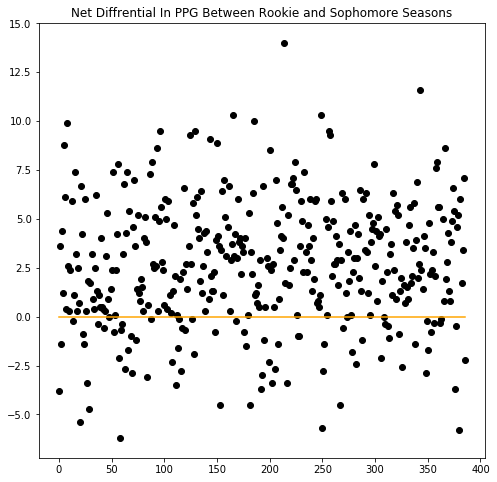

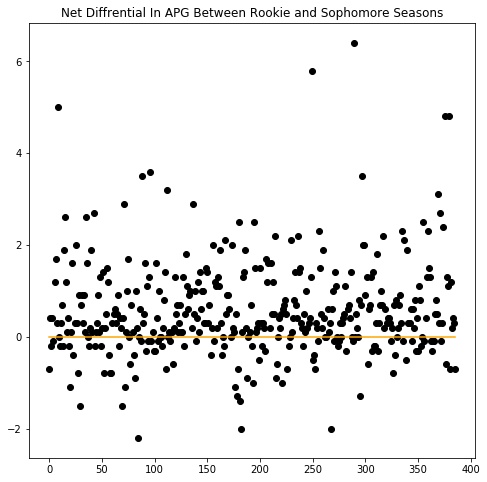

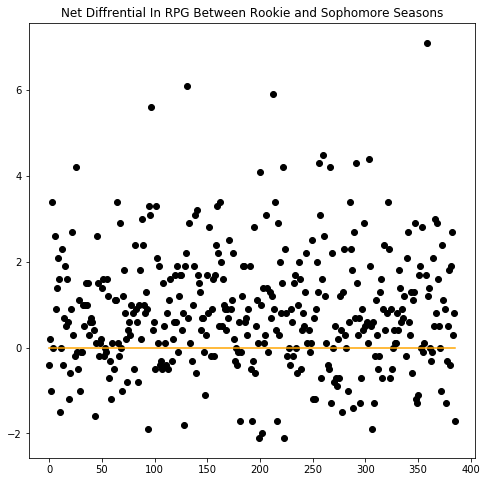

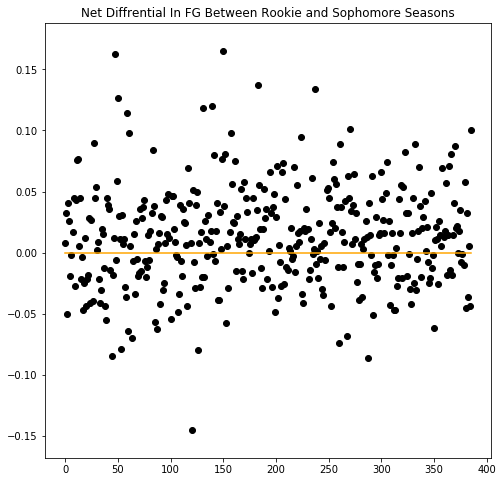

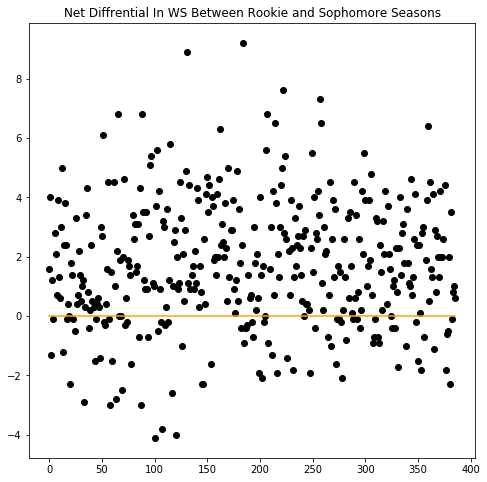

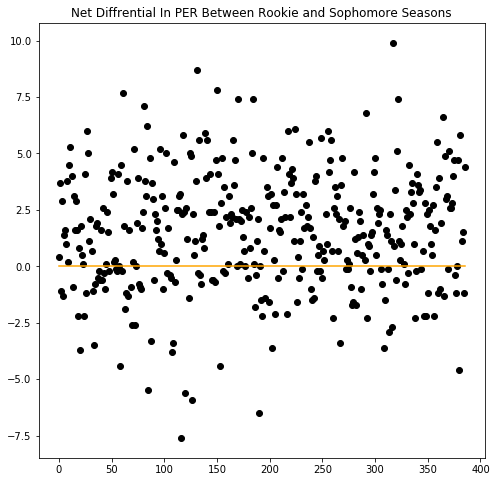

In [6]:
for index in range(len(R_S)):
    plt.figure(figsize=(8,8))
    plt.scatter(np.arange(0,len(R_S[index])),R_S[index],color='black')
    plt.plot(np.arange(0,len(R_S[index])),np.zeros(len(R_S[index])),c='orange')
    plt.title("Net Diffrential In " + str(plt_labels[index])+ " Between Rookie and Sophomore Seasons")
    pos= np.sum(np.array(R_S[index]) >= 0, axis=0)
    per_pos= pos/len(R_S[index])
    print('The percentage of players that had a net positive ' + str(plt_labels[index]) +' diffrential between rookie and sophomore seasons are '+ str(per_pos*100) + '%')

Now, let us investigate the diffrentials across player's sophomore seasons to the next three seasons on average! It seems that in all the per game stats we plotted, a majority of players (>50%) improved from their rookie to sophomore season, now, let us delve into the same previously calculated statistics and investigate 

The percentage of players that had a net positive PPG diffrential between sophomore season and the next three seasons are 65.80310880829016%
The percentage of players that had a net positive APG diffrential between sophomore season and the next three seasons are 66.32124352331607%
The percentage of players that had a net positive RPG diffrential between sophomore season and the next three seasons are 61.398963730569946%
The percentage of players that had a net positive FG diffrential between sophomore season and the next three seasons are nan%
The percentage of players that had a net positive WS diffrential between sophomore season and the next three seasons are 68.13471502590673%
The percentage of players that had a net positive PER diffrential between sophomore season and the next three seasons are 61.917098445595855%


C:\Users\sumis\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in long_scalars
  import sys


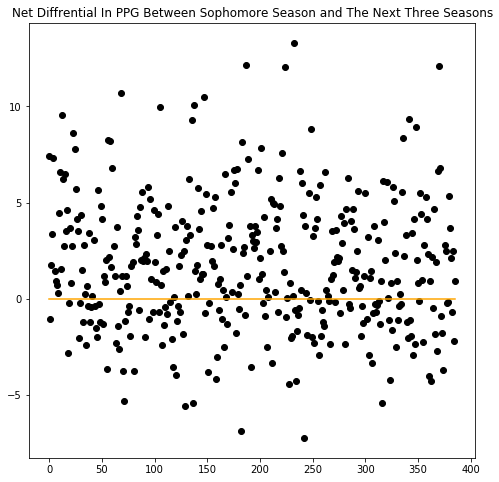

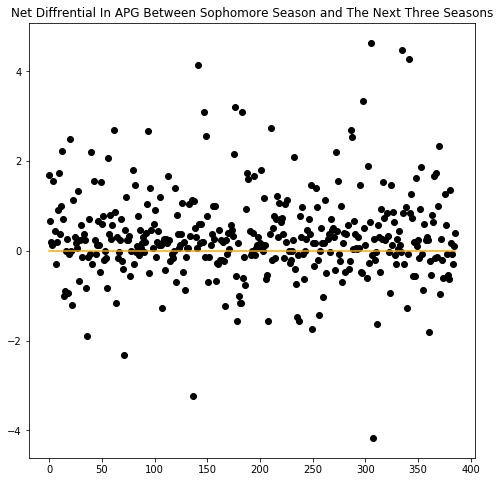

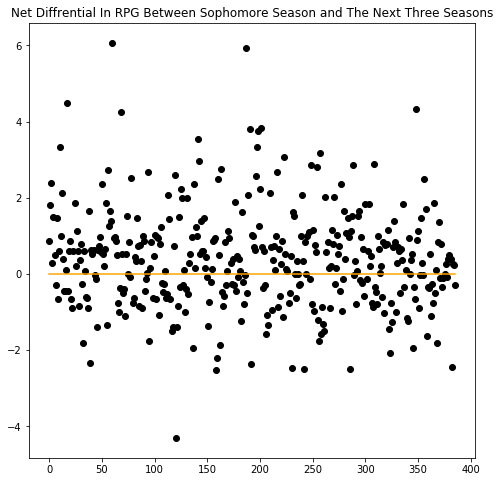

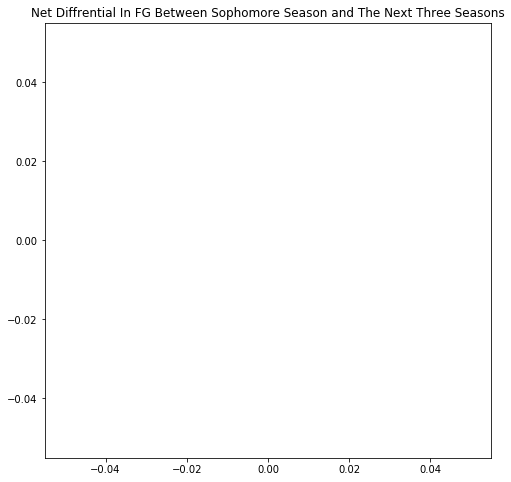

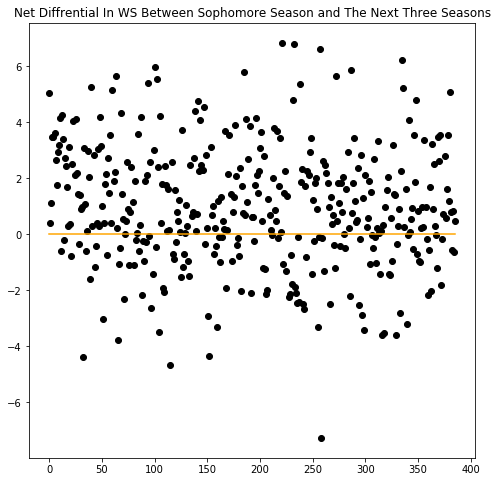

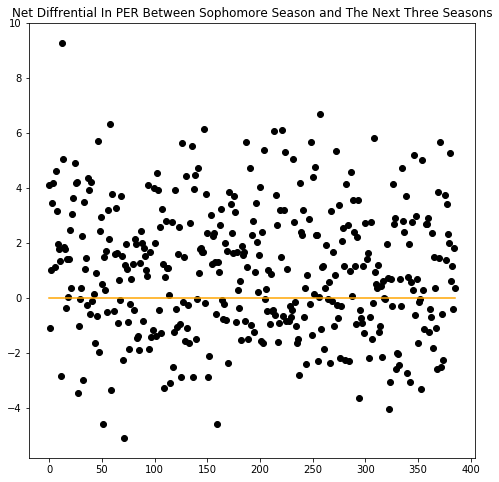

In [7]:
for index in range(len(S_3)):
    plt.figure(figsize=(8,8))
    plt.scatter(np.arange(0,len(S_3[index])),S_3[index],color='black')
    plt.plot(np.arange(0,len(S_3[index])),np.zeros(len(S_3[index])),c='orange')
    plt.title("Net Diffrential In " + str(plt_labels[index])+ " Between Sophomore Season and The Next Three Seasons")
    pos= np.sum(np.array(S_3[index]) >= 0, axis=0)
    per_pos= pos/len(S_3[index])
    print('The percentage of players that had a net positive ' + str(plt_labels[index]) +' diffrential between sophomore season and the next three seasons are '+ str(per_pos*100) + '%')